In [1]:
import numpy as np
from scipy import stats
import networkx as nx
from networkx.algorithms import tree

In [ ]:
from algorithm.louvain import louvain
from algorithm.spectral_clustering import spectral_clustering, normalized_spectral_clustering
from algorithm.hierarchical_clustering import mst_cut_clustering
from utils.analyze import get_rs_from_fixed_weighted_degree, compute_clustering, validation, metrics_to_df 

## Experiment 4: Comparison with fixed p_out=0.05 and variating p_in/p_out from 1 to 10. graph size is 100, 2 clusters

In [27]:
rs = get_rs_by_relation(r_out = 0.05, relation = np.linspace( 1, 20, 40))

Generating graphs started


100%|██████████| 40/40 [25:04<00:00, 37.60s/it]


Generating graphs complete
spectral_clustering started


100%|██████████| 40/40 [01:13<00:00,  1.84s/it]


spectral_clustering complete
normalized_spectral_clustering started


100%|██████████| 40/40 [01:15<00:00,  1.89s/it]


normalized_spectral_clustering complete
louvain started


100%|██████████| 40/40 [06:56<00:00, 10.42s/it]


louvain complete


100%|██████████| 40/40 [00:03<00:00, 11.86it/s]


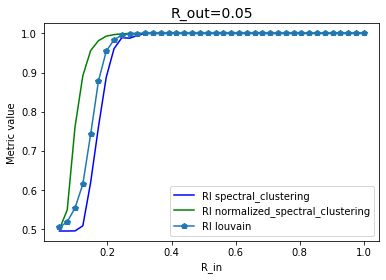

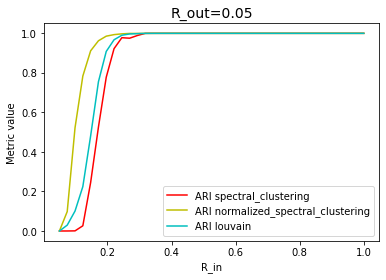

In [28]:
true_labels, result, estimated_graphs_bags= compute_clustering(
    rs,
    algos=[spectral_clustering, normalized_spectral_clustering, louvain ],
    num_clusters = 2,
    cluster_size=50,
    sample_vol = 100,
    num_repeats=400)

metrics100 = validation(true_labels, result, estimated_graphs_bags) 

df100 = metrics_to_df(metrics100, rs)
df100.to_csv('graph_100_r_out05_sample_100_repeates400')

Generating graphs started


100%|██████████| 40/40 [54:37<00:00, 81.93s/it] 


Generating graphs complete
spectral_clustering started


100%|██████████| 40/40 [01:13<00:00,  1.85s/it]


spectral_clustering complete
normalized_spectral_clustering started


100%|██████████| 40/40 [01:15<00:00,  1.88s/it]


normalized_spectral_clustering complete
louvain started


100%|██████████| 40/40 [06:55<00:00, 10.39s/it]


louvain complete


100%|██████████| 40/40 [00:03<00:00, 11.59it/s]


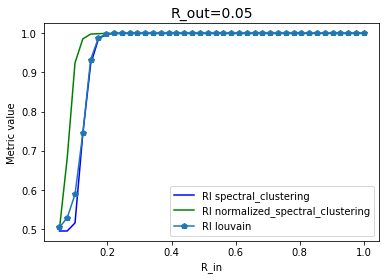

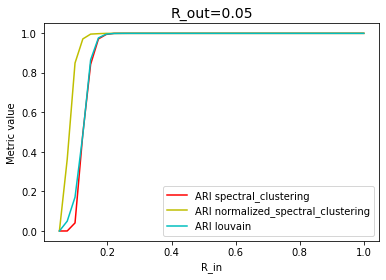

In [29]:
true_labels, result, estimated_graphs_bags= compute_clustering(
    rs,
    algos=[spectral_clustering, normalized_spectral_clustering, louvain ],
    num_clusters = 2,
    cluster_size=50,
    sample_vol = 200,
    num_repeats=400)

metrics200 = validation(true_labels, result, estimated_graphs_bags) 

df200 = metrics_to_df(metrics200, rs)
df200.to_csv('graph_100_r_out05_sample_200_repeates400')

Generating graphs started


100%|██████████| 40/40 [55:34<00:00, 83.37s/it] 


Generating graphs complete
spectral_clustering started


100%|██████████| 40/40 [05:35<00:00,  8.39s/it]


spectral_clustering complete
normalized_spectral_clustering started


100%|██████████| 40/40 [05:30<00:00,  8.26s/it]


normalized_spectral_clustering complete
louvain started


100%|██████████| 40/40 [13:30<00:00, 20.25s/it]


louvain complete


100%|██████████| 40/40 [00:09<00:00,  4.37it/s]


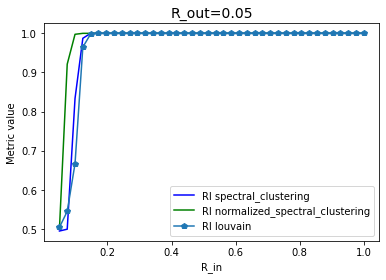

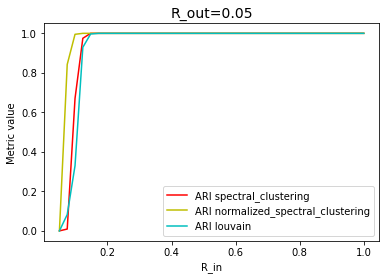

In [30]:
true_labels, result, estimated_graphs_bags= compute_clustering(
    rs,
    algos=[spectral_clustering, normalized_spectral_clustering, louvain ],
    num_clusters = 2,
    cluster_size=50,
    sample_vol = 500,
    num_repeats=400)

metrics500 = validation(true_labels, result, estimated_graphs_bags) 

df500 = metrics_to_df(metrics500, rs)
df500.to_csv('graph_100_r_out05_sample_500_repeates400')

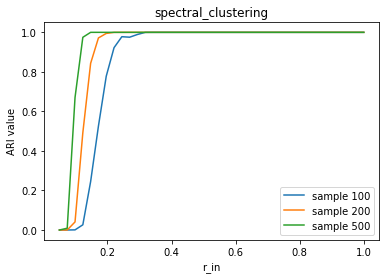

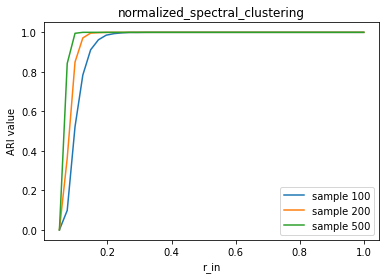

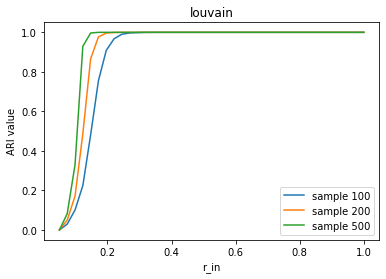

In [31]:
list(metrics100.keys())

for algo in metrics100.keys():
    df = pd.DataFrame(list(zip(rs[0], metrics100[algo]['ARI'], metrics200[algo]['ARI'], metrics500[algo]['ARI'])), columns = ['r_in', 'sample 100', 'sample 200', 'sample 500']).set_index(['r_in'])
    df.plot(title=algo, ylabel = 'ARI value')

Generating graphs started


100%|██████████| 40/40 [09:29<00:00, 14.25s/it]


Generating graphs complete
spectral_clustering started


100%|██████████| 40/40 [00:58<00:00,  1.46s/it]


spectral_clustering complete
normalized_spectral_clustering started


100%|██████████| 40/40 [00:58<00:00,  1.47s/it]


normalized_spectral_clustering complete
louvain started


100%|██████████| 40/40 [01:10<00:00,  1.77s/it]


louvain complete


100%|██████████| 40/40 [00:05<00:00,  7.04it/s]


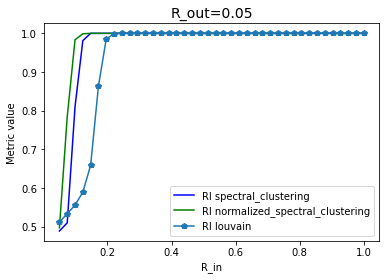

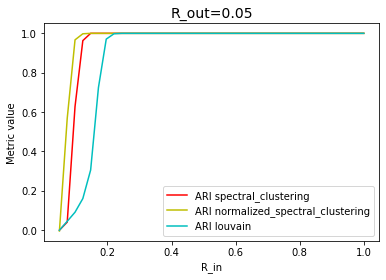

In [33]:
true_labels, result, estimated_graphs_bags= compute_clustering(
    rs,
    algos=[spectral_clustering, normalized_spectral_clustering, louvain ],
    num_clusters = 2, cluster_size=20, sample_vol = 500,
    num_repeats=400)

metrics40_500 = validation(true_labels, result, estimated_graphs_bags) 

df40_500 = metrics_to_df(metrics40_500, rs)
df40_500.to_csv('graph_40_r_out05_sample_500_repeates200')

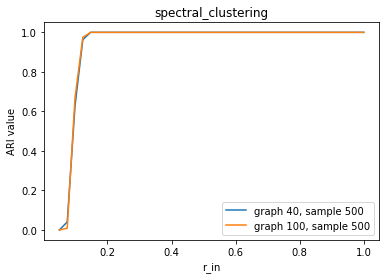

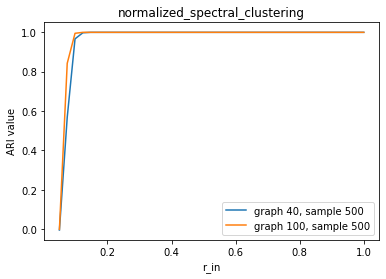

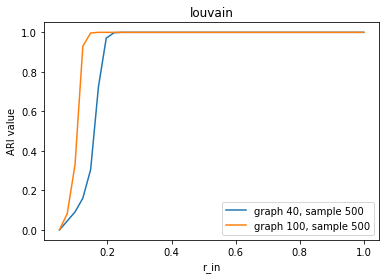

In [35]:
list(metrics100.keys())
for algo in metrics100.keys():
    df = pd.DataFrame(list(zip(rs[0], metrics40_500[algo]['ARI'], metrics500[algo]['ARI'])), columns = ['r_in', 'graph 40, sample 500', 'graph 100, sample 500']).set_index(['r_in'])
    df.plot(title=algo, ylabel = 'ARI value')